# 04 - Image Morphology

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
from scipy.ndimage import correlate

from skimage import color, io, measure, img_as_ubyte
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import threshold_otsu, median, gaussian, prewitt_h,prewitt_v, prewitt
from skimage.morphology import erosion, dilation, opening, closing, disk

In [7]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

### Exercise 1
We will start by computing a binary image from the lego image:

* Read the image into im_org.
* Convert the image to gray scale.
* Find a threshold using Otsu's method.
* Apply the treshold and generate a binary image bin_img.
* Visualize the image using plot_comparison(im_org, bin_img, 'Binary image')

As ncan be seen, the lego brick is not segmented perfectly. There are holes in the segmentation. Let us see if what we can do.

In [15]:
# Load image
im_org = io.imread('data/' + 'lego_5.png')

# Convert to grey
im_org = color.rgb2gray(im_org)

# To ubyte
im_lego = img_as_ubyte(im_org)

# Otsu threshold
thresh = threshold_otsu(image=im_lego)
bin_img = piccy <= thresh

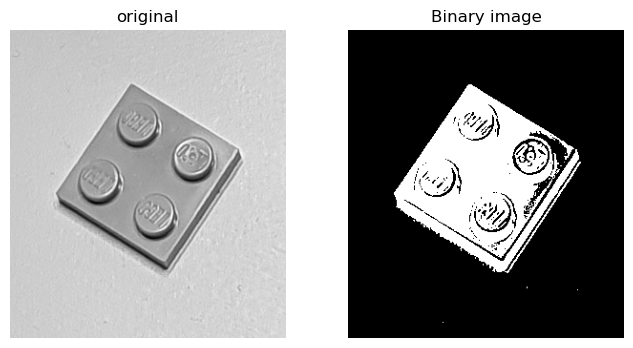

In [12]:
plot_comparison(im_org, bin_img, 'Binary image')

### Exercise 2 - Erosion
We will start by creating a structuring element. In scikit-image they are called footprint. A disk shaped footprint can be created by:


In [46]:
footprint = disk(3)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


The morphological operation erosion can remove small objects, separate objects and make objects smaller. Try it on the binary lego image:

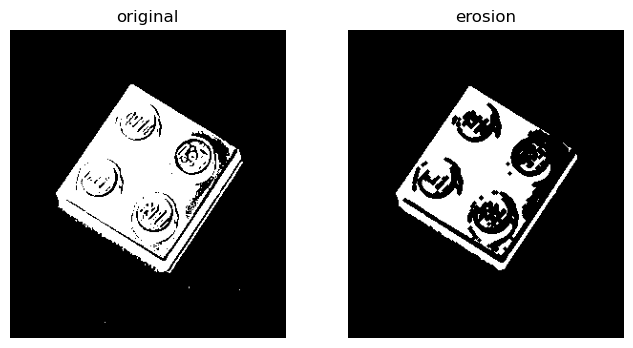

In [42]:
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, 'erosion')

### Exercise 3 - Dilation 
The morphological operation dilation makes objects larger, closes holes and connects objects. Try it on the binary lego image:

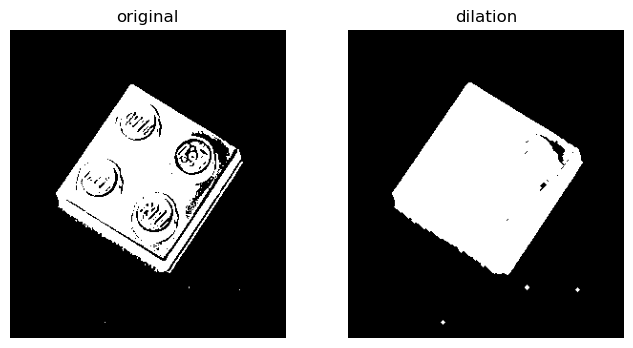

In [43]:
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

### Exercise 4 - Opening
The morphological operation opening removes small objects without changing the size of the remaining objects. Try it on the binary lego image:

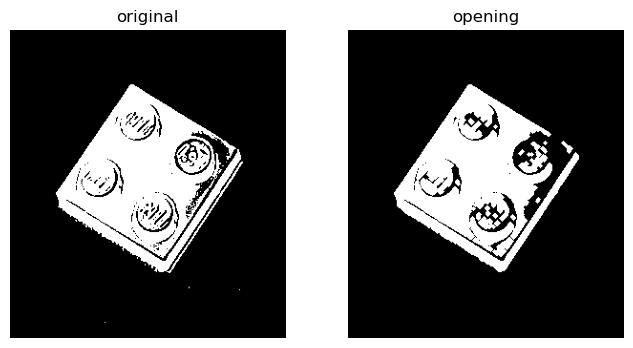

In [44]:
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

### Exercise 5
The morphological operation closing closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image:

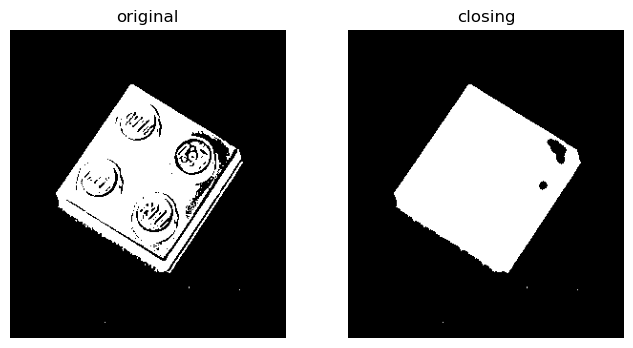

In [47]:
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

## Object outline

In [48]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

### Exercise 6
Compute the outline of the binary image of the lego brick. What do you observe?